In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("realistic_resumes_with_experience.csv")

# Display the first few rows of the dataset
df.head()


,filename,language,name,email,phone,experience,project,education,certificate,languages,website,hobbies,location
0,resume_1.pdf,fr,Curtis Raczka,curtis.raczka@yahoo.com,+33-176-8501,Software Engineer at Apple (6 months) - Full-t...,Implemented an Automated Tax Filing System,BSc in Finance,CFA Level 2,"French, Arabic",www.myresume.net,"Photography, Gaming","Sundern, Unknown"
1,resume_2.pdf,en,William Jones,william.jones@outlook.com,+971-950-8085,UI/UX Designer at Facebook (4 years) - Part-ti...,Optimized Investment Portfolios for High-Net-W...,BSc in Finance,Certified Financial Planner,"English, French",www.example.com,"Photography, Gaming","Bako, Unknown"
2,resume_3.pdf,en,Luigi Ellis,luigi.ellis@yahoo.com,+971-720-8814,DevOps Engineer at Deloitte (1 year) - Freelan...,Developed a Cloud-Based E-commerce Platform,BSc in Computer Science,AWS Solutions Architect,"English, Spanish",www.portfolio.org,"Hiking, Painting","Sa Kaeo, Unknown"
3,resume_4.pdf,en,Elinore Simpson,elinore.simpson@outlook.com,+91-280-4353,Software Engineer at Deloitte (1 year) - Inter...,Led a Successful Marketing Campaign for a New ...,MBA in Digital Marketing,Certified Digital Marketer,"French, Arabic",www.portfolio.org,"Hiking, Painting","Gyānpur, Unknown"
4,resume_5.pdf,fr,Jackson Springer,jackson.springer@outlook.com,+1-568-1455,Marketing Manager at Tesla (4 years) - Full-ti...,Implemented a Scalable Machine Learning Pipeline,PhD in Artificial Intelligence,AWS Solutions Architect,"French, Arabic",www.portfolio.org,"Hiking, Painting","Aracruz, Unknown"


In [8]:
# Check for missing values in each column
print("Missing Values Per Column:")
missing_data = df.isnull().sum()
print(missing_data)

# # Plot missing values
# plt.figure(figsize=(10,6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap')
# plt.show()


Missing Values Per Column:
filename       0
language       0
name           0
email          0
phone          0
experience     0
project        0
education      0
certificate    0
languages      0
website        0
hobbies        0
location       0
dtype: int64


Duplicate Counts Per Column:
filename          0
language       1998
name              8
email             2
phone             0
experience       26
project        1991
education      1993
certificate    1993
languages      1997
website        1997
hobbies        1996
location         88
dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_21520\1984943719.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='viridis')


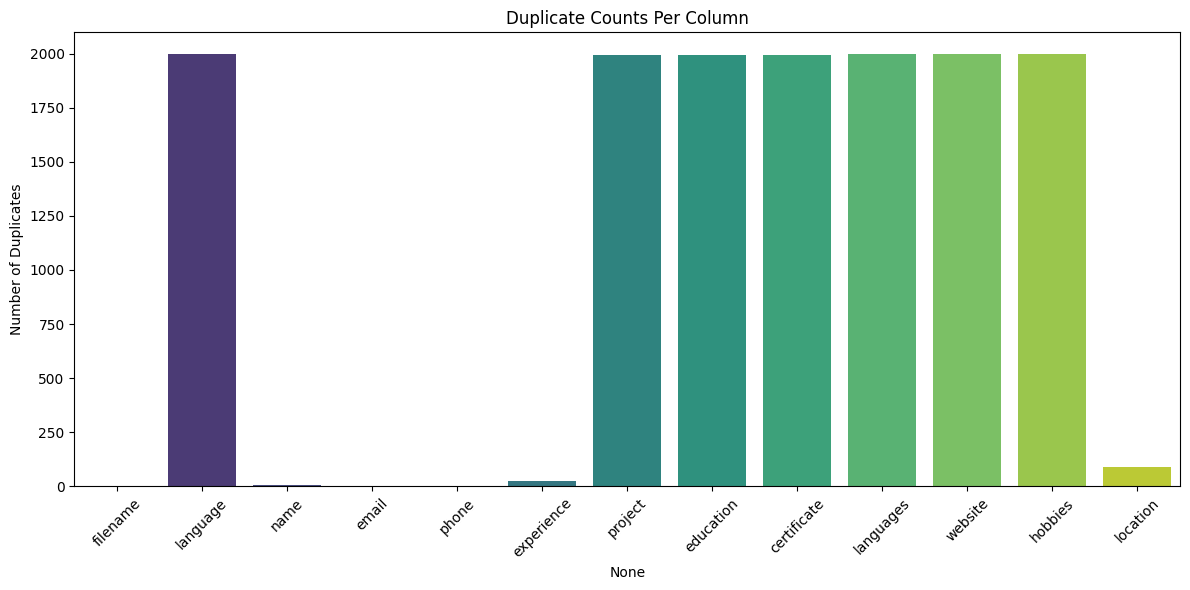

Duplicated Rows:
Empty DataFrame
Columns: [filename, language, name, email, phone, experience, project, education, certificate, languages, website, hobbies, location]
Index: []
Duplicated Names:
             filename language            name                       email  \
200    resume_201.pdf       en      Eric Scott      eric.scott@outlook.com   
1628  resume_1629.pdf       en    Robert Terry    robert.terry@example.com   
1687  resume_1688.pdf       fr     Mary Porter       mary.porter@gmail.com   
1705  resume_1706.pdf       en    Mark Sanchez      mark.sanchez@yahoo.com   
1738  resume_1739.pdf       fr  David Williams  david.williams@example.com   
1832  resume_1833.pdf       en   Michael Smith     michael.smith@yahoo.com   
1876  resume_1877.pdf       fr    David Fisher      david.fisher@gmail.com   
1955  resume_1956.pdf       en    Curtis Smith    curtis.smith@outlook.com   

              phone                                         experience  \
200    +44-967-4682  UI/UX D

In [9]:
# Check for duplicates
# Count duplicates in each column
duplicate_counts = df.apply(lambda x: x.duplicated().sum())

# Print the number of duplicates per column
print("Duplicate Counts Per Column:")
print(duplicate_counts)

# Visualize duplicates per column
plt.figure(figsize=(12, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='viridis')
plt.title('Duplicate Counts Per Column')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find all duplicated rows in the dataframe
duplicated_rows = df[df.duplicated()]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

# You can also display only the duplicated entries in a specific column if needed
# Example: Duplicated names
duplicated_names = df[df.duplicated(subset=["name"])]
print("Duplicated Names:")
print(duplicated_names)



In [10]:
# Get a summary of the dataset
df.describe(include='all')

# Show the data types of each column
print("\nData Types:")
print(df.dtypes)



Data Types:
filename       object
language       object
name           object
email          object
phone          object
experience     object
project        object
education      object
certificate    object
languages      object
website        object
hobbies        object
location       object
dtype: object


In [11]:
# Visualize the distribution of numerical columns
df.select_dtypes(include=[np.number]).hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Columns')
plt.tight_layout()
plt.show()


ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
# Count plot for the 'language' column (you can replace with any other categorical column)
plt.figure(figsize=(8,6))
sns.countplot(x='language', data=df, palette='Set2')
plt.title('Distribution of Languages in Dataset')
plt.show()

# Count plot for 'location'
plt.figure(figsize=(12,6))
sns.countplot(y='location', data=df, palette='Set1', order=df['location'].value_counts().index)
plt.title('Distribution of Locations')
plt.show()


In [ ]:
# Correlation matrix for numerical columns
corr = df.select_dtypes(include=[np.number]).corr()

# Heatmap to visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Top 10 most frequent job titles
top_job_titles = df["experience"].value_counts().head(10)

# Plot the top job titles
plt.figure(figsize=(10,6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Job Experiences")
plt.xlabel("Count")
plt.ylabel("Job Experience")
plt.tight_layout()
plt.show()


In [ ]:
# Visualize the distribution of the experience column (if the column has proper categories)
plt.figure(figsize=(10,6))
sns.countplot(x='experience', data=df, palette='Set2')
plt.title('Distribution of Job Experiences')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Check if there are any missing values again
print(f"Missing Values After Imputation:\n{df.isnull().sum()}")

# Impute missing values (example: replace with 'Unknown' for categorical and median for numerical)
df['experience'].fillna('Unknown', inplace=True)
df['project'].fillna('Unknown', inplace=True)
df['education'].fillna('Unknown', inplace=True)
df['certificate'].fillna('Unknown', inplace=True)

# For numerical columns, you can replace NaN with the median
df['languages'].fillna(df['languages'].mode()[0], inplace=True)
df['location'].fillna('Unknown', inplace=True)

# Check missing values again after imputation
print(f"Missing Values After Imputation:\n{df.isnull().sum()}")


In [ ]:
# Visualizing the distribution of 'experience' based on 'location'
plt.figure(figsize=(12,6))
sns.countplot(x='experience', hue='location', data=df, palette='Set3')
plt.title('Distribution of Job Experience Across Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Save the cleaned dataset to a new CSV file after preprocessing
df.to_csv("cleaned_realistic_resumes.csv", index=False)
print("Cleaned dataset saved as 'cleaned_realistic_resumes.csv'")
